## K_MEANS

In [22]:
# Import Libabry
# import libabry
import json
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [8]:
# Membaca Data yang sudah di lakakan tahapan prepocessing pada sebelumnya
data = pd.read_csv('Komentar_Youtube_finish.csv', sep=';')
data1 = data["Cleaned_Text"].fillna('')
display(data1.head())

,Cleaned_Text
0,anak the real anak setan
1,mimpi temu laki ganteng bahkan siang pas tidur...
2,ada nonton seru oct angkat tangan guys
3,anak kembar nyata
4,jin jatuh cinta berani nyentuh manusia


In [19]:
# TF-IDF
sentence = data1
vectorizer = TfidfVectorizer()
vectorized_documents = vectorizer.fit_transform(sentence)

# PCA 2 dimensi
pca = PCA(n_components=2)
reduced_documents = pca.fit_transform(vectorized_documents.toarray())


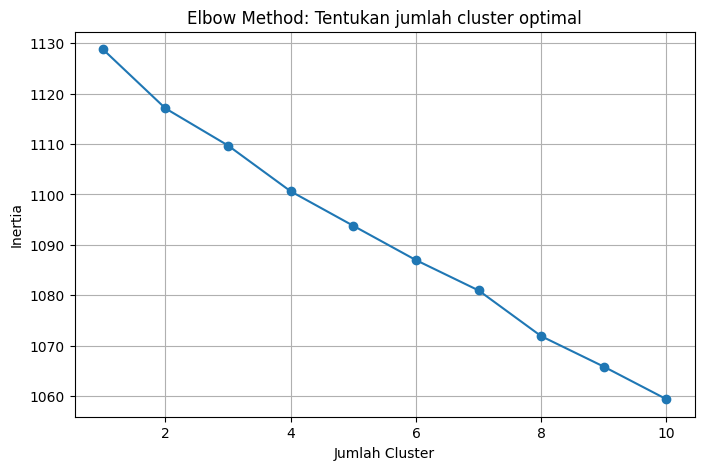

In [20]:
# Metode Elbow Untuk menentukan Nilai K
def elbow_method(vectorized_documents, max_k= 10):
  inertia =[]
  for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectorized_documents)
    inertia.append(kmeans.inertia_)

  plt.figure(figsize=(8, 5))
  plt.plot(range(1, max_k+1), inertia, marker='o')
  plt.title ('Elbow Method: Tentukan jumlah cluster optimal')
  plt.xlabel('Jumlah Cluster')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()
elbow_method(vectorized_documents, max_k=10)

k = diambil 5, dikarenakan pada hasil dari grafik Elbow terlihat bahwa:

Penurunan nilai inertia dari k=1 ke k=4 masih cukup tajam

Mulai dari k=5 ke atas, penurunannya mulai melambat dan lebih landai

Inilah inti dari konsep elbow (titik siku):
K kita pilih pada titik dimana peningkatan jumlah cluster tidak lagi menghasilkan penurunan inertia yang signifikan.

In [32]:
# algoritma K-means
k = 5#

# random_state membuat hasil eksperimen tidak berubah-ubah
kmeans = KMeans (n_clusters=k, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

clusters = kmeans .fit_predict(vectorized_documents)
data['cluster'] = clusters
data[['Cleaned_Text', 'cluster']].head()

,Cleaned_Text,cluster
0,anak the real anak setan,2
1,mimpi temu laki ganteng bahkan siang pas tidur...,3
2,ada nonton seru oct angkat tangan guys,4
3,anak kembar nyata,2
4,jin jatuh cinta berani nyentuh manusia,3


/tmp/ipython-input-3359601451.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', k).colors
/tmp/ipython-input-3359601451.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (reduced_documents[kmeans.labels_ == i, 0],


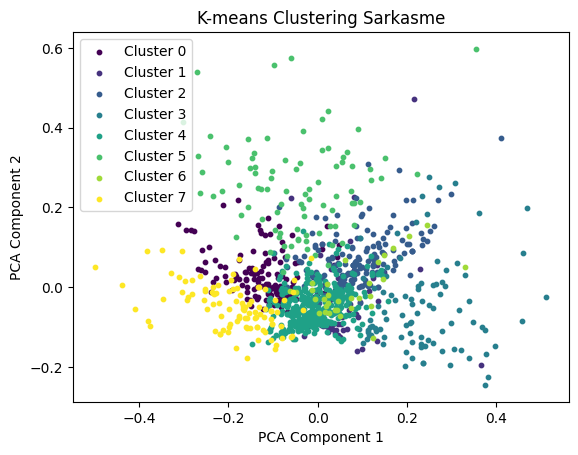

In [31]:
# visualisasi Cluster
import matplotlib.cm as cm

# Generate k distinct colors using a colormap
colors = cm.get_cmap('viridis', k).colors

for i in range (k):
  plt.scatter (reduced_documents[kmeans.labels_ == i, 0],
              reduced_documents[kmeans.labels_ == i, 1],
              s= 10, c=colors[i],
              label=f'Cluster {i}')

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Sarkasme')
plt.show()

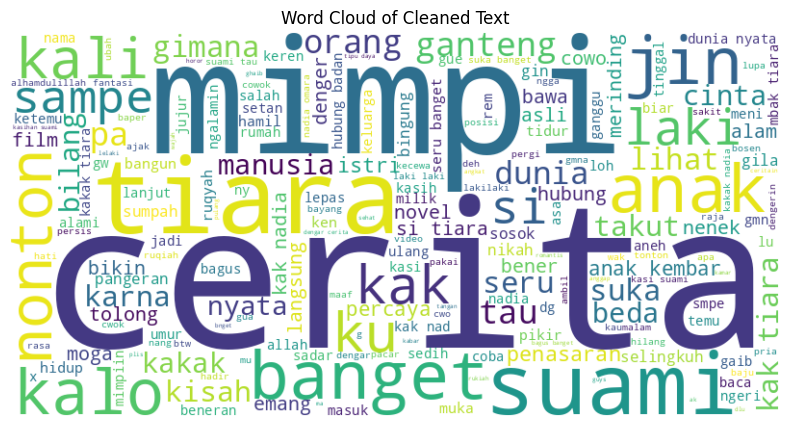

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Pastikan combined_text sudah didefinisikan dari langkah sebelumnya
combined_text = ' '.join(data['Cleaned_Text'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()

## Topic Modeling
pada tahap ini menggunakan Algoritma Bertopic

In [36]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.8 MB/s eta 0:00:00


In [37]:
# Import library
import pandas as pd
import nltk
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [38]:
# Membaca Data yang sudah di lakakan tahapan prepocessing pada sebelumnya
data = pd.read_csv('Komentar_Youtube_finish.csv', sep=';')
data1 = data["Cleaned_Text"].fillna('')
display(data1.head())

,Cleaned_Text
0,anak the real anak setan
1,mimpi temu laki ganteng bahkan siang pas tidur...
2,ada nonton seru oct angkat tangan guys
3,anak kembar nyata
4,jin jatuh cinta berani nyentuh manusia


In [40]:
## Buat Semantic Embeddings
# Kita gunakan model Sentence-Transformer (misalnya all-MiniLM-L6-v2)

# Ensure all text entries are strings and handle NaNs for BERTopic
documents_for_bertopic = data['Cleaned_Text'].fillna('').astype(str)

print("⏳ Menghitung Semantic Embeddings (BERT)...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(documents_for_bertopic, show_progress_bar=True)

#Terapkan BERTopic
# BERTopic secara internal menggunakan UMAP dan HDBSCAN
topic_model = BERTopic(
    language="indonesian", # Asumsi teks dalam Bahasa Indonesia
    calculate_probabilities=False,
    verbose=True
)

topics, probs = topic_model.fit_transform(documents_for_bertopic, embeddings)
data['Topic_BERTopic'] = topics

# Dapatkan informasi topik (kata kunci)
topic_info = topic_model.get_topic_info()
n_topics_bertopic = data['Topic_BERTopic'].nunique() - (1 if -1 in data['Topic_BERTopic'].unique() else 0)

print(f"✅ BERTopic Selesai. Jumlah Topik Ditemukan: {n_topics_bertopic} (di luar -1)")
print("Distribusi Topik BERTopic (-1 = Noise/Outlier):")
print(data['Topic_BERTopic'].value_counts())

print("\nTop 5 Topik dan Kata Kuncinya:")
display(topic_info.head(6)) # Termasuk -1 (noise)

⏳ Menghitung Semantic Embeddings (BERT)...


Batches:   0%|          | 0/37 [00:00<?, ?it/s]

2025-12-17 14:35:00,232 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-17 14:35:04,786 - BERTopic - Dimensionality - Completed ✓
2025-12-17 14:35:04,787 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-17 14:35:04,847 - BERTopic - Cluster - Completed ✓
2025-12-17 14:35:04,855 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-17 14:35:04,893 - BERTopic - Representation - Completed ✓


✅ BERTopic Selesai. Jumlah Topik Ditemukan: 18 (di luar -1)
Distribusi Topik BERTopic (-1 = Noise/Outlier):
Topic_BERTopic
-1     341
 0     298
 1     115
 2      66
 3      58
 4      54
 5      42
 6      27
 7      19
 8      19
 9      18
 10     16
 11     13
 12     12
 13     12
 14     11
 15     11
 16     11
 17     11
Name: count, dtype: int64

Top 5 Topik dan Kata Kuncinya:


,Topic,Count,Name,Representation,Representative_Docs
0,-1,341,-1_cerita_tiara_nonton_kak,"[cerita, tiara, nonton, kak, suami, banget, an...",[banyakin cerita gin kak nad nonton kali kali ...
1,0,298,0_mimpi_jin_laki_tiara,"[mimpi, jin, laki, tiara, orang, ku, suami, ce...",[istri waras laki waras nenek waras fyi ngetik...
2,1,115,1_cerita_banget_seru_keren,"[cerita, banget, seru, keren, merinding, seram...","[nonton seru cerita, seru banget, cerita kali ..."
3,2,66,2_tiara_selingkuh_si_tiaraa,"[tiara, selingkuh, si, tiaraa, kak, kecewa, ka...","[suami tiara, si tiara, tiara selingkuh]"
4,3,58,3_nadia_kak_omara_cerita,"[nadia, kak, omara, cerita, kakak, nonton, si,...","[tidur nonton nadia omara, kak tolong cerita s..."
5,4,54,4_anak_kembar_penasaran_ganteng,"[anak, kembar, penasaran, ganteng, lihat, ken,...",[penasaran anak kembar tiara wak ken lihat waj...


/tmp/ipython-input-3264665667.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_clusters)


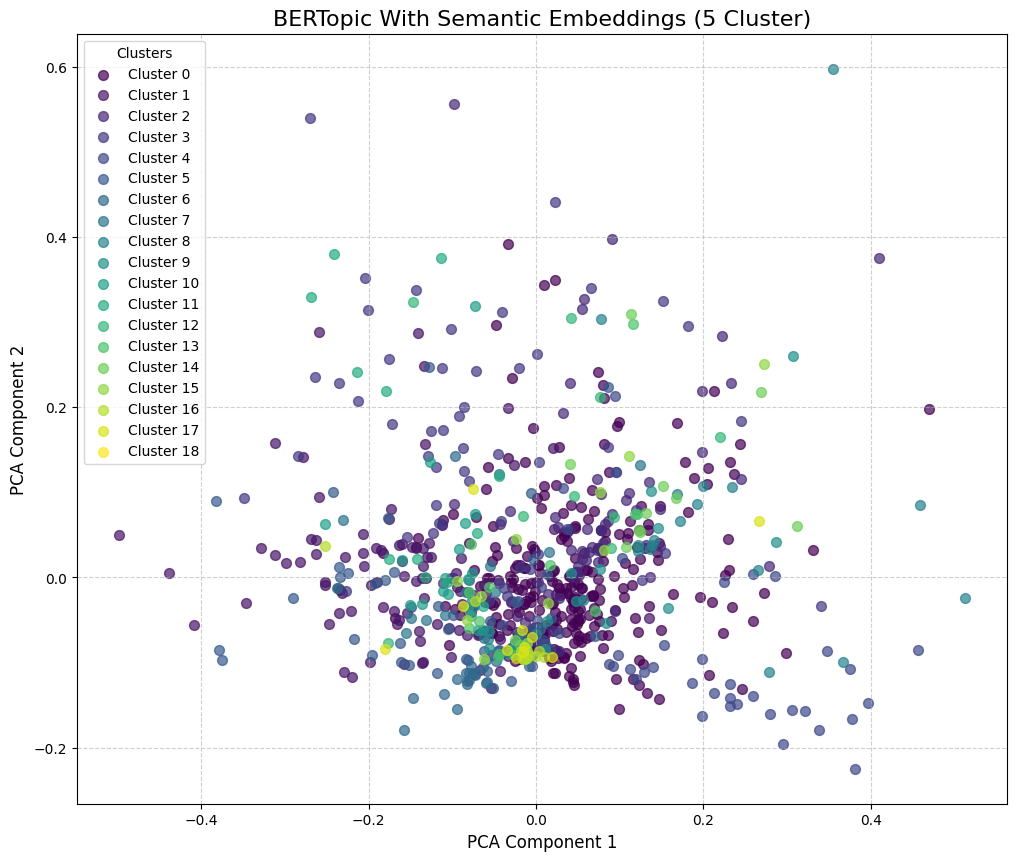

In [41]:
import matplotlib.pyplot as plt
# Removed: import matplotlib.colormaps as cm # Import colormaps module

# Get the number of clusters from the HAC result
num_clusters = data['Topic_BERTopic'].nunique()

# Define a color map for better distinction, ensuring it can handle `num_clusters` colors
colors = plt.cm.get_cmap('viridis', num_clusters)

plt.figure(figsize=(12, 10))
for i in range(num_clusters):
    # Filter data for the current cluster using the correct labels from the DataFrame
    cluster_data = reduced_documents[data['Topic_BERTopic'] == i]

    plt.scatter(cluster_data[:, 0],
                cluster_data[:, 1],
                s=50, # Increased marker size for better visibility
                c=[colors(i)], # Use the colormap to get a unique color for each cluster
                label=f'Cluster {i}',
                alpha=0.7)

plt.legend(title='Clusters', loc='best')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title('BERTopic With Semantic Embeddings (5 Cluster)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()